In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import gc
import random
import warnings
import pickle

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from utils.train_utils import *
warnings.filterwarnings(action='ignore')
path = '../data/train_results/evening_results/'

In [49]:
## cycle result
with open(path + 'e_cycle_results_list.pkl', 'rb') as f:
    cycle_results_list = pickle.load(f)

train_x_cycle, train_y_cycle, train_pred_cycle,\
valid_time_x_cycle, valid_x_cycle, valid_y_cycle = cycle_results_list

In [50]:
## trend
with open(path + 'e_trend_results_list.pkl', 'rb') as f:
    trend_results_list = pickle.load(f)

train_x_trend, train_y_trend, train_pred_trend,\
valid_time_x_trend, valid_x_trend, valid_y_trend = trend_results_list

In [51]:
### morning scaler
with open('../data/preprocess/scalers.pkl', 'rb') as f:
    sclaers = pickle.load(f)# [m_time_scaler, l_time_scaler, e_time_scaler, no_time_scaler]
time_scaler = sclaers[2]

In [52]:
new_trend_results_list = []
for data in trend_results_list:
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 0)
    new_trend_results_list.append(data.reshape(shape))

new_cycle_results_list = []
for data in cycle_results_list:
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 1)
    new_cycle_results_list.append(data.reshape(shape))

total_results_list = []
for i in range(6):
   total_results_list.append(new_trend_results_list[i] + new_cycle_results_list[i])

In [53]:
train_x, train_y, train_pred,\
valid_time_x, valid_x, valid_y = total_results_list

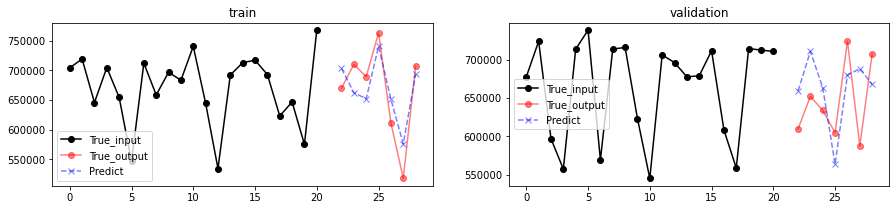

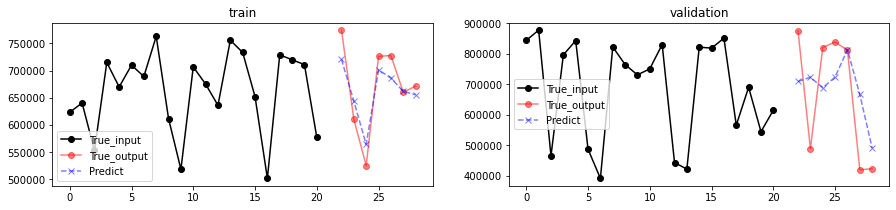

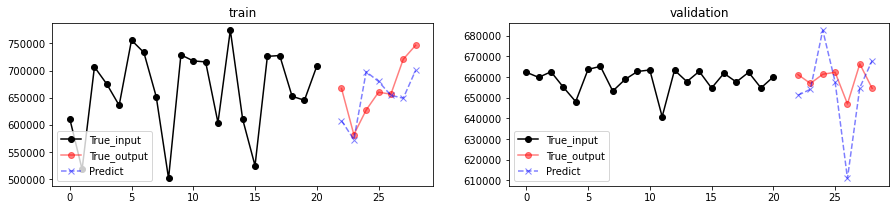

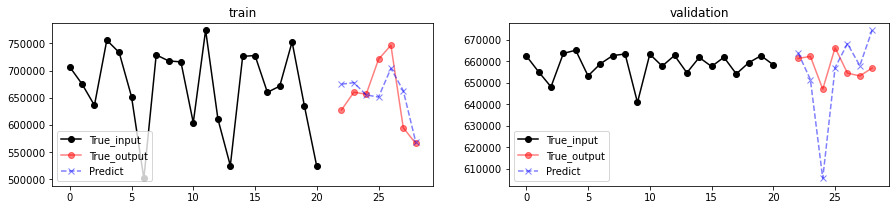

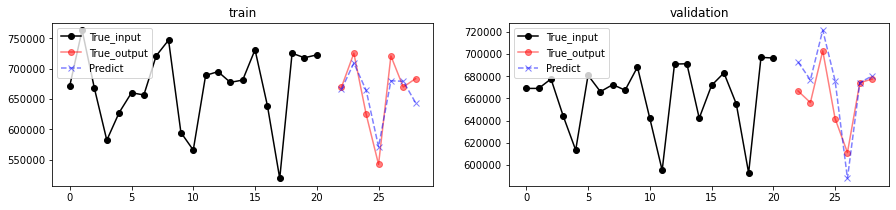

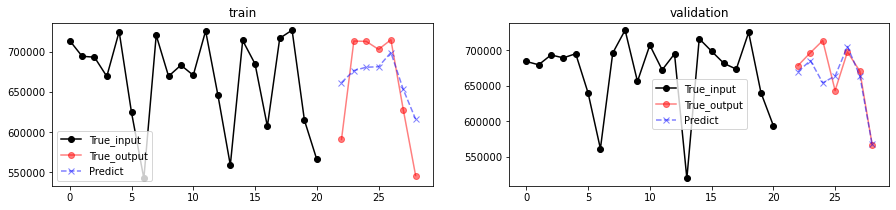

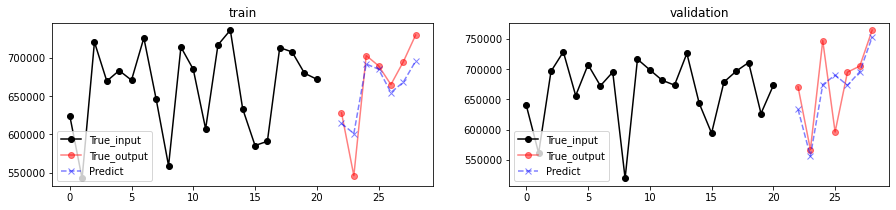

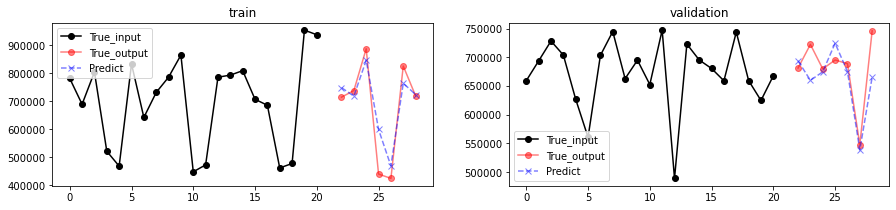

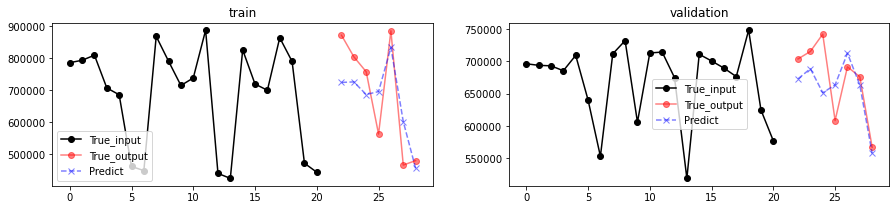

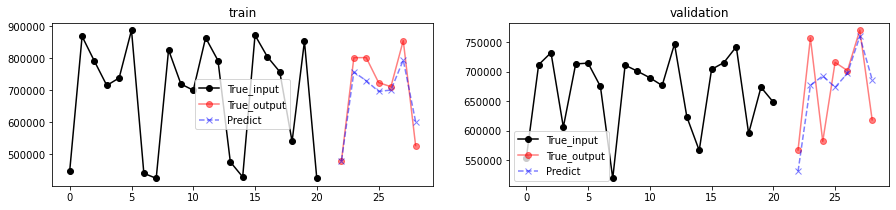

In [54]:
plot_predict(train_x, train_y, train_pred,\
                valid_time_x, valid_x, valid_y )

with open(path + 'e_total_results_list.pkl', 'wb') as f:
    pickle.dump(total_results_list, f)            

In [60]:
evening_time.shape

(69, 21, 15)

In [2]:
### morning scaler
with open('../data/preprocess/scalers.pkl', 'rb') as f:
    sclaers = pickle.load(f)# [m_time_scaler, l_time_scaler, e_time_scaler, no_time_scaler]
time_scaler = sclaers[2]

with open('../data/preprocess/evening_last_time.pkl', 'rb') as f:
    evening_time = pickle.load(f)
with open('../data/preprocess/full_evening_cycle_pred.pkl', 'rb') as f:
    evening_cycle_pred = pickle.load(f)
with open('../data/preprocess/full_evening_trend_pred.pkl', 'rb') as f:
    evening_trend_pred = pickle.load(f)

In [3]:
def resize(data, select_col = 0):
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 0)
    return data.reshape(shape)

In [4]:
evening_pred = evening_trend_pred + evening_cycle_pred
evening_x = evening_time[:,:,-2] + evening_time[:,:,-1]
evening_pred = resize(evening_pred, select_col = 0)
evening_x = resize(evening_x, select_col = 0)

중림동


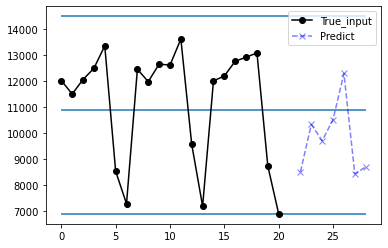

In [242]:
i = 11
plt.plot(np.arange(21), evening_x[i],   # m_train_time.cpu().detach().numpy()[i,:,-2],
            marker = 'o', color = 'black', label = 'True_input')
plt.plot(np.arange(22,29),evening_pred[i],    #.cpu().detach().numpy()[i],
        color = 'blue', label = 'Predict', marker = 'x', ls = '--', alpha = 0.5)
plt.hlines(6888.79, xmin = 0, xmax = 28)
plt.hlines(10876.579666666667, xmin = 0, xmax = 28)
plt.hlines(14491.23, xmin = 0, xmax = 28)
plt.legend()
print('중림동')
plt.show()

중림동


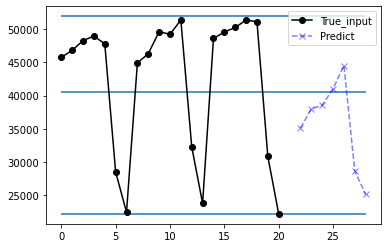

In [245]:
i = 45
plt.plot(np.arange(21), evening_x[i],   # m_train_time.cpu().detach().numpy()[i,:,-2],
            marker = 'o', color = 'black', label = 'True_input')
plt.plot(np.arange(22,29),evening_pred[i],    #.cpu().detach().numpy()[i],
        color = 'blue', label = 'Predict', marker = 'x', ls = '--', alpha = 0.5)
plt.hlines(22149.75, xmin = 0, xmax = 28)
plt.hlines(040489.80933333332, xmin = 0, xmax = 28)
plt.hlines(51975.97, xmin = 0, xmax = 28)
print('중림동')
plt.legend()
plt.show()

중림동


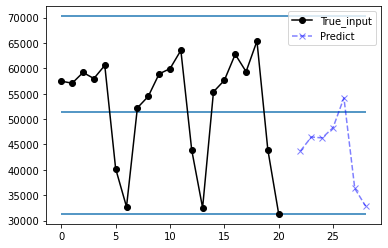

In [246]:
i = 23
plt.plot(np.arange(21), evening_x[i],   # m_train_time.cpu().detach().numpy()[i,:,-2],
            marker = 'o', color = 'black', label = 'True_input')
plt.plot(np.arange(22,29),evening_pred[i],    #.cpu().detach().numpy()[i],
        color = 'blue', label = 'Predict', marker = 'x', ls = '--', alpha = 0.5)
plt.hlines(70266.17, xmin = 0, xmax = 28)
plt.hlines(51307.35599999999, xmin = 0, xmax = 28)
plt.hlines(31307.16, xmin = 0, xmax = 28)
print('중림동')
plt.legend()
plt.show()

In [5]:
nontime = pd.read_csv('../data/original/nontime_data.txt', sep = ' ')
time = pd.read_csv('../data/original/time_data.txt', sep = ' ')

In [6]:
dong_list= time.HDONG_NM.unique()
dong_list

array(['고산1동', '고산2동', '고산3동', '공릉1동', '공릉2동', '광희동', '남산1동', '남산2동',
       '남산3동', '남산4동', '다산동', '대봉1동', '대봉2동', '대신동', '동인동', '동화동', '두산동',
       '만촌1동', '만촌2동', '만촌3동', '명동', '범물1동', '범물2동', '범어1동', '범어2동',
       '범어3동', '범어4동', '삼덕동', '상계10동', '상계1동', '상계2동', '상계3.4동', '상계5동',
       '상계6.7동', '상계8동', '상계9동', '상동', '성내1동', '성내2동', '성내3동', '소공동',
       '수성1가동', '수성2.3가동', '수성4가동', '신당5동', '신당동', '약수동', '월계1동', '월계2동',
       '월계3동', '을지로동', '장충동', '중계1동', '중계2.3동', '중계4동', '중계본동', '중동',
       '중림동', '지산1동', '지산2동', '청구동', '파동', '필동', '하계1동', '하계2동', '황금1동',
       '황금2동', '황학동', '회현동'], dtype=object)

In [11]:
code_list = [1114065000, 1114061500, 2726066200, 2726061000, 2711067000,
       2726065100, 1114066500, 2726062000, 2726051000, 1135057000,
       2711068000, 1114068000, 2726068000, 1135063000, 1114067000,
       2711069000, 1114055000, 2726053000, 1135070000, 1114059000,
       1135062400, 1135059500, 1135061200, 1114054000, 2711064000,
       1135061100, 1114062500, 2711066000, 1114064500, 2726055000,
       1135069500, 1135072000, 2726056000, 2711054500, 2726064000,
       1135060000, 2726060100, 1135062500, 2726052000, 2726063000,
       2726069000, 2726065200, 2726059000, 2711051700, 2726057000,
       1114052000, 2726066100, 1135067000, 1114060500, 1135066500,
       2726054000, 2711065000, 1135056000, 2726060200, 2726067000,
       1135058000, 2711058500, 1114063500, 1135064000, 2726056100,
       1135062100, 2726058000, 2711056500, 1135061900, 1135071000,
       1114058000, 1114057000, 2711057500, 2711059500]
def name2index(dong_name):
    for idx, code in enumerate(code_list):
        if code == time[time.HDONG_NM == dong_name].HDONG_CD.iloc[0]:
            return(idx)

In [12]:
pred_june = pd.DataFrame([evening_pred[name2index(dong)] for dong in dong_list])
pred_june.columns = ['2020-06-01','2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07']
pred_june.index = dong_list
pred_june['AREA'] = [nontime[nontime.HDONG_NM == dong].AREA.iloc[0] for dong in dong_list]
how_insame = pred_june.copy()
how_inother = pred_june.copy()

In [13]:
pred_june.loc[['중림동','소공동','회현동']]

2020-06-01    2020-06-02    2020-06-03    2020-06-04    2020-06-05  \
중림동   8506.269411  10329.000055   9704.501479  10517.115693  12290.016543   
소공동  35128.470644  37976.839801  38558.812580  41034.781412  44538.486302   
회현동  43703.649581  46472.429242  46284.378451  48305.135073  54196.713141   

       2020-06-06    2020-06-07       AREA  
중림동   8432.936387   8694.050839  482329.92  
소공동  28603.433915  25087.459259  893419.62  
회현동  36317.898509  32839.208280  847351.57

In [14]:
def find_level(pred, dong_name):
    '''
    0 ~20 : 1 
    20~40 : 2
    40~60 : 3
    60~80 : 4
    80~100: 5
    '''
    dist = np.array(time[(time.HDONG_NM == dong_name)&(time.time == 'evening')].flow_pop.iloc[-30:].sort_values())
    for idx, val in enumerate(dist):
        if val > pred:
            break
    if idx == 30-1:
        return 1
    else:
        return int(((idx+1)/30) * 100 // 20) + 1

In [15]:
for dong in dong_list:
    for day in ['2020-06-01','2020-06-02','2020-06-03','2020-06-04','2020-06-05','2020-06-06','2020-06-07']:
        how_insame.loc[dong,day] = find_level(pred_june.loc[dong,day],dong)
how_insame

2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  2020-06-06  \
고산1동         2.0         2.0         2.0         2.0         3.0         1.0   
고산2동         1.0         2.0         2.0         2.0         3.0         1.0   
고산3동         2.0         2.0         2.0         2.0         3.0         1.0   
공릉1동         1.0         2.0         2.0         2.0         2.0         1.0   
공릉2동         1.0         1.0         1.0         1.0         1.0         1.0   
...          ...         ...         ...         ...         ...         ...   
하계2동         1.0         2.0         2.0         2.0         2.0         2.0   
황금1동         1.0         2.0         2.0         2.0         3.0         1.0   
황금2동         1.0         2.0         2.0         2.0         4.0         1.0   
황학동          2.0         3.0         3.0         3.0         3.0         2.0   
회현동          2.0         3.0         3.0         3.0         3.0         2.0   

      2020-06-07         AREA  
고산1동         1.0   8881312.38  
고산2동         1.0  24523329.28  
고산3동         1.0   5315712.45  
공릉1동         1.0   1224521.56  
공릉2동         1.0   7006762.92  
...          ...          ...  
하계2동         1.0    502928.23  
황금1동         1.0   2510860.55  
황금2동         1.0   1259194.57  
황학동          2.0    328678.23  
회현동          1.0    847351.57  

[69 rows x 8 columns]

In [21]:
flowperarea = pd.DataFrame({'flowperarea':pred_june.iloc[:,:7].mean(axis = 1)})
for idx, dong in enumerate(dong_list):
    flowperarea.iloc[idx] = flowperarea.iloc[idx] / nontime[nontime.HDONG_NM == dong].AREA.iloc[0] * 100
flowperarea = np.array(flowperarea.flowperarea.sort_values())

def find_level_other(pred, dong_name):
    '''
    0 ~20 : 1 
    20~40 : 2
    40~60 : 3
    60~80 : 4
    80~100: 5
    '''
    for idx, val in enumerate(flowperarea):
        if val > pred:
            break
    if idx == 68:
        return 1
    else:
        return int(((idx+1)/69) * 100 // 20) + 1
        

In [22]:
how_inother = pred_june.copy()
for dong in dong_list:
    for day in ['2020-06-01','2020-06-02','2020-06-03','2020-06-04','2020-06-05','2020-06-06','2020-06-07']:
        how_inother.loc[dong,day] = find_level_other(how_inother.loc[dong,day] / how_inother.loc[dong,"AREA"] * 100, dong)
how_inother.loc[['중림동','소공동','회현동']]

2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  2020-06-06  \
중림동         3.0         4.0         4.0         4.0         4.0         3.0   
소공동         5.0         5.0         5.0         5.0         5.0         5.0   
회현동         1.0         1.0         1.0         1.0         1.0         5.0   

     2020-06-07       AREA  
중림동         3.0  482329.92  
소공동         4.0  893419.62  
회현동         5.0  847351.57

In [23]:
how_insame

2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  2020-06-06  \
고산1동         2.0         2.0         2.0         2.0         3.0         1.0   
고산2동         1.0         2.0         2.0         2.0         3.0         1.0   
고산3동         2.0         2.0         2.0         2.0         3.0         1.0   
공릉1동         1.0         2.0         2.0         2.0         2.0         1.0   
공릉2동         1.0         1.0         1.0         1.0         1.0         1.0   
...          ...         ...         ...         ...         ...         ...   
하계2동         1.0         2.0         2.0         2.0         2.0         2.0   
황금1동         1.0         2.0         2.0         2.0         3.0         1.0   
황금2동         1.0         2.0         2.0         2.0         4.0         1.0   
황학동          2.0         3.0         3.0         3.0         3.0         2.0   
회현동          2.0         3.0         3.0         3.0         3.0         2.0   

      2020-06-07         AREA  
고산1동         1.0   8881312.38  
고산2동         1.0  24523329.28  
고산3동         1.0   5315712.45  
공릉1동         1.0   1224521.56  
공릉2동         1.0   7006762.92  
...          ...          ...  
하계2동         1.0    502928.23  
황금1동         1.0   2510860.55  
황금2동         1.0   1259194.57  
황학동          2.0    328678.23  
회현동          1.0    847351.57  

[69 rows x 8 columns]

In [24]:
how_insame.to_csv('../data/predict_june/evening_insame.csv')
how_inother.to_csv('../data/predict_june/evening_inother.csv')

In [28]:
print("저녁")
display(how_insame.loc[['중림동','소공동','회현동']])
display(how_inother.loc[['중림동','소공동','회현동']])

저녁


2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  2020-06-06  \
중림동         2.0         3.0         3.0         3.0         4.0         2.0   
소공동         3.0         3.0         3.0         3.0         3.0         2.0   
회현동         2.0         3.0         3.0         3.0         3.0         2.0   

     2020-06-07       AREA  
중림동         2.0  482329.92  
소공동         2.0  893419.62  
회현동         1.0  847351.57

2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  2020-06-06  \
중림동         3.0         4.0         4.0         4.0         4.0         3.0   
소공동         5.0         5.0         5.0         5.0         5.0         5.0   
회현동         1.0         1.0         1.0         1.0         1.0         5.0   

     2020-06-07       AREA  
중림동         3.0  482329.92  
소공동         4.0  893419.62  
회현동         5.0  847351.57

In [25]:
how_insame

2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  2020-06-06  \
고산1동         2.0         2.0         2.0         2.0         3.0         1.0   
고산2동         1.0         2.0         2.0         2.0         3.0         1.0   
고산3동         2.0         2.0         2.0         2.0         3.0         1.0   
공릉1동         1.0         2.0         2.0         2.0         2.0         1.0   
공릉2동         1.0         1.0         1.0         1.0         1.0         1.0   
...          ...         ...         ...         ...         ...         ...   
하계2동         1.0         2.0         2.0         2.0         2.0         2.0   
황금1동         1.0         2.0         2.0         2.0         3.0         1.0   
황금2동         1.0         2.0         2.0         2.0         4.0         1.0   
황학동          2.0         3.0         3.0         3.0         3.0         2.0   
회현동          2.0         3.0         3.0         3.0         3.0         2.0   

      2020-06-07         AREA  
고산1동         1.0   8881312.38  
고산2동         1.0  24523329.28  
고산3동         1.0   5315712.45  
공릉1동         1.0   1224521.56  
공릉2동         1.0   7006762.92  
...          ...          ...  
하계2동         1.0    502928.23  
황금1동         1.0   2510860.55  
황금2동         1.0   1259194.57  
황학동          2.0    328678.23  
회현동          1.0    847351.57  

[69 rows x 8 columns]

In [26]:
how_inother

2020-06-01  2020-06-02  2020-06-03  2020-06-04  2020-06-05  2020-06-06  \
고산1동         1.0         1.0         1.0         1.0         1.0         1.0   
고산2동         1.0         1.0         1.0         1.0         1.0         1.0   
고산3동         1.0         1.0         1.0         1.0         1.0         1.0   
공릉1동         5.0         5.0         5.0         5.0         5.0         5.0   
공릉2동         1.0         1.0         1.0         1.0         2.0         1.0   
...          ...         ...         ...         ...         ...         ...   
하계2동         5.0         5.0         5.0         5.0         5.0         5.0   
황금1동         1.0         1.0         1.0         1.0         2.0         1.0   
황금2동         2.0         3.0         2.0         3.0         3.0         2.0   
황학동          5.0         5.0         5.0         5.0         5.0         5.0   
회현동          1.0         1.0         1.0         1.0         1.0         5.0   

      2020-06-07         AREA  
고산1동         1.0   8881312.38  
고산2동         1.0  24523329.28  
고산3동         1.0   5315712.45  
공릉1동         5.0   1224521.56  
공릉2동         1.0   7006762.92  
...          ...          ...  
하계2동         5.0    502928.23  
황금1동         1.0   2510860.55  
황금2동         2.0   1259194.57  
황학동          5.0    328678.23  
회현동          5.0    847351.57  

[69 rows x 8 columns]

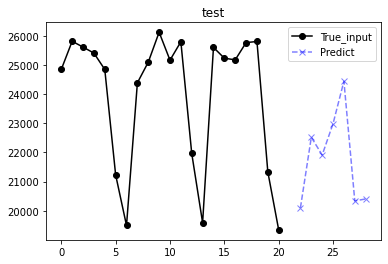

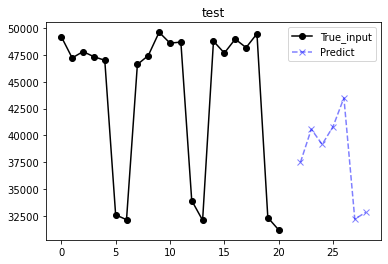

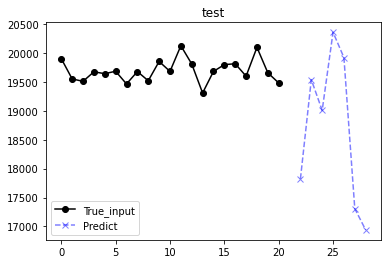

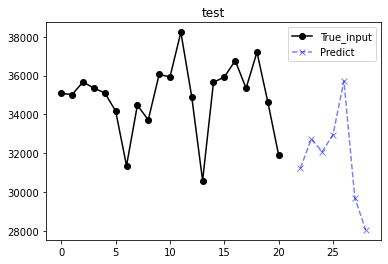

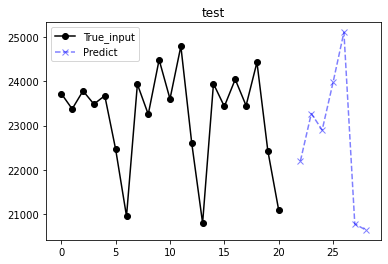

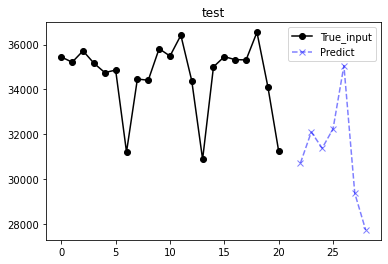

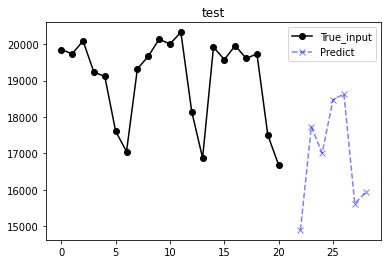

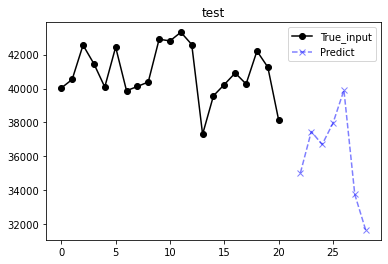

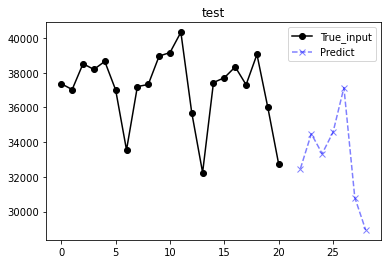

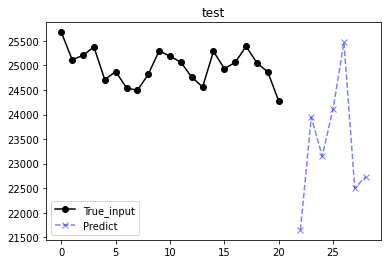

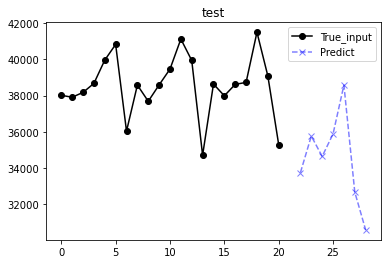

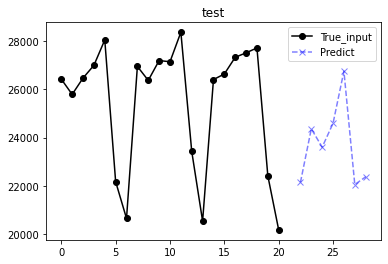

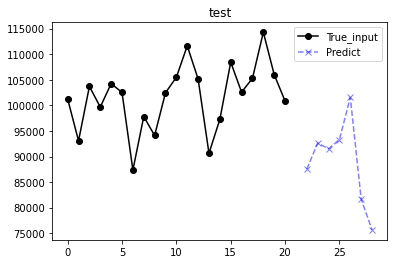

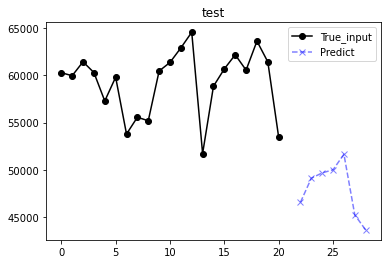

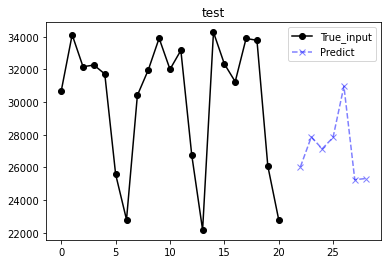

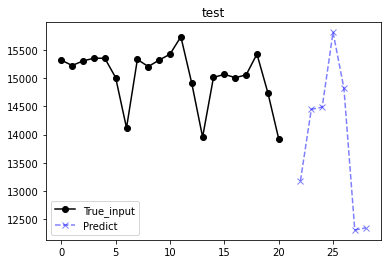

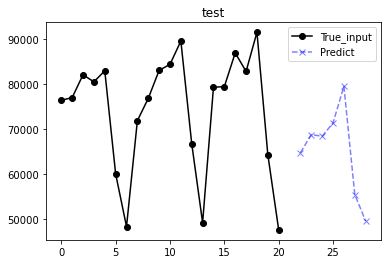

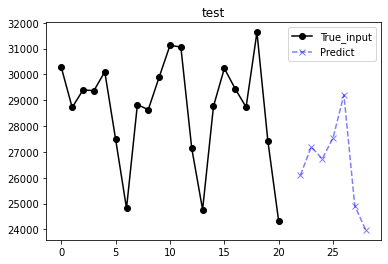

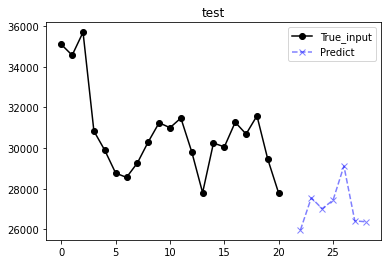

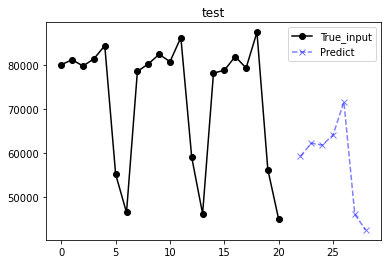

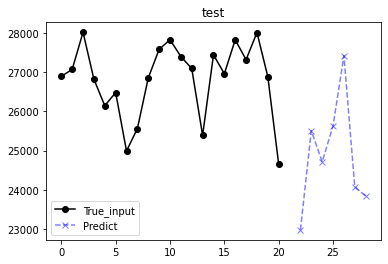

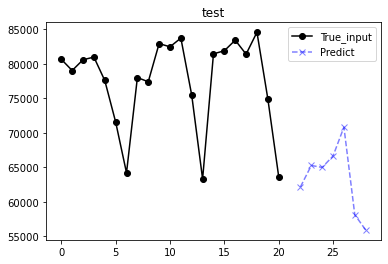

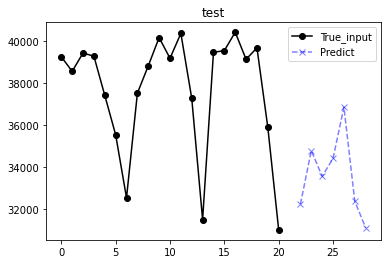

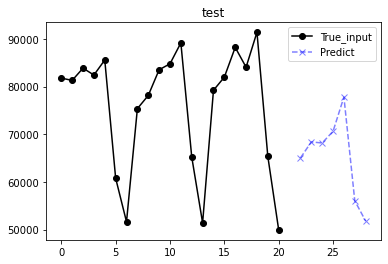

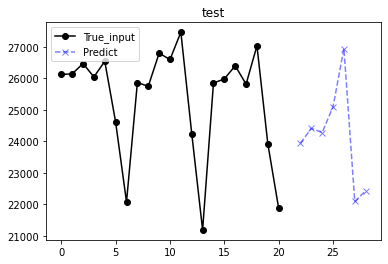

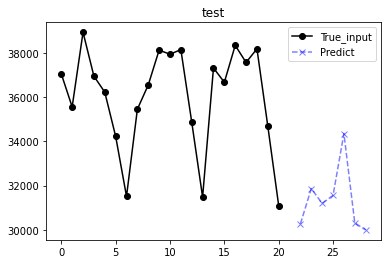

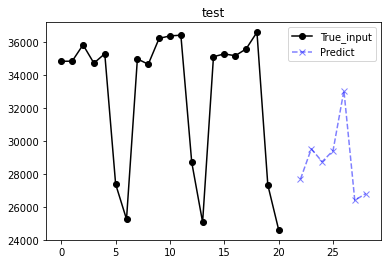

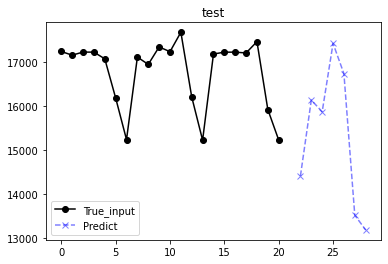

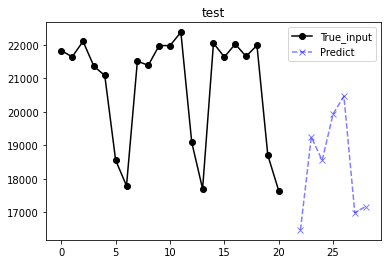

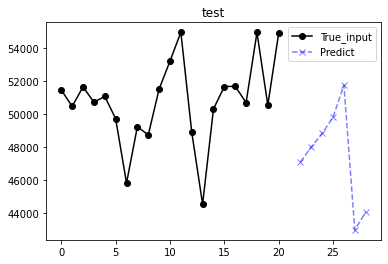

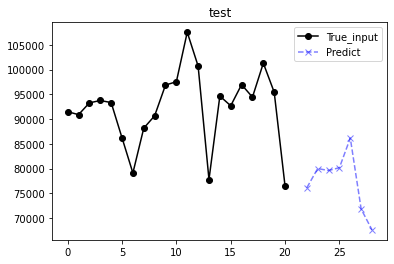

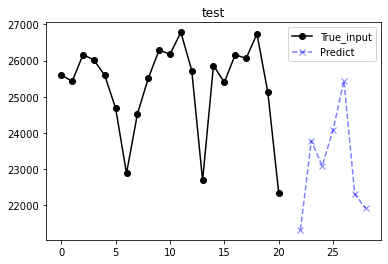

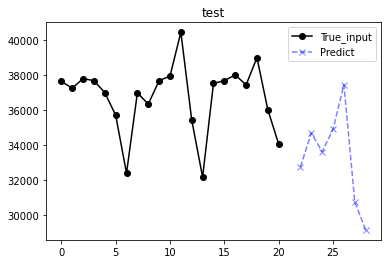

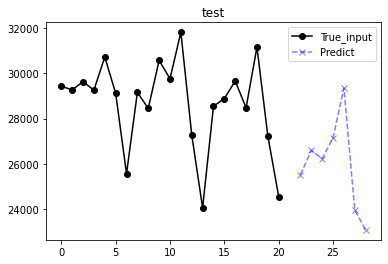

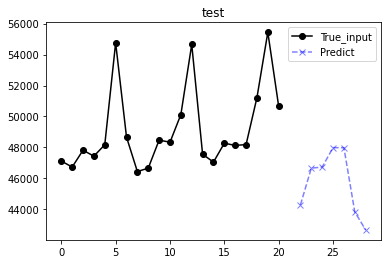

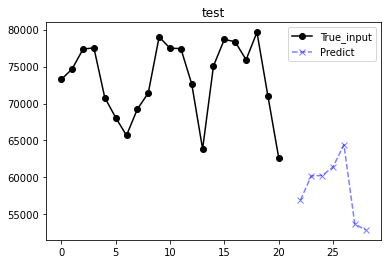

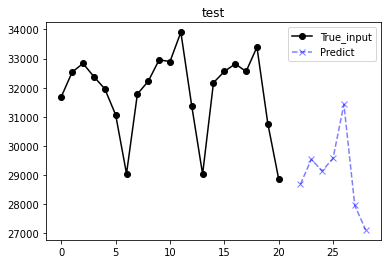

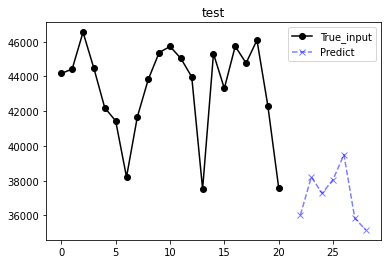

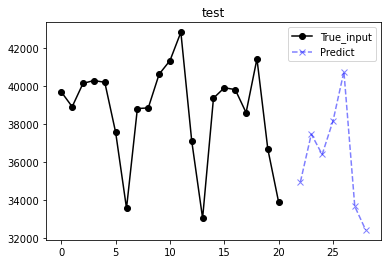

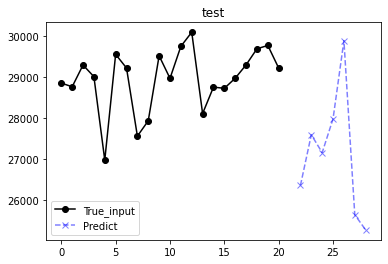

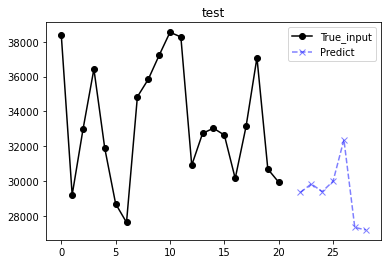

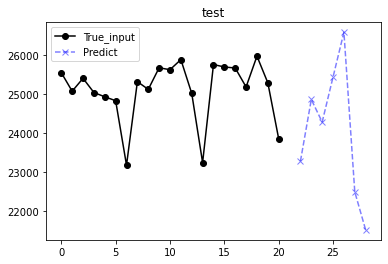

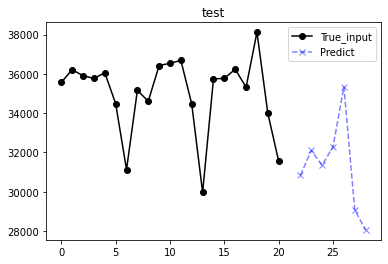

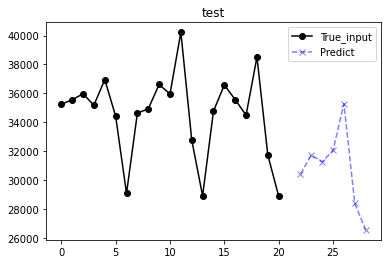

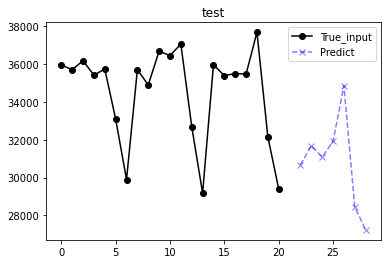

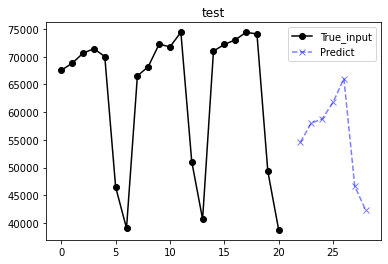

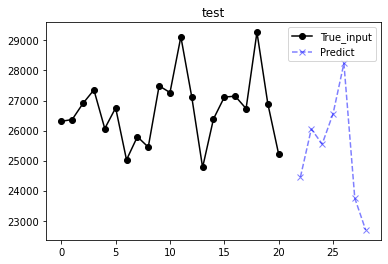

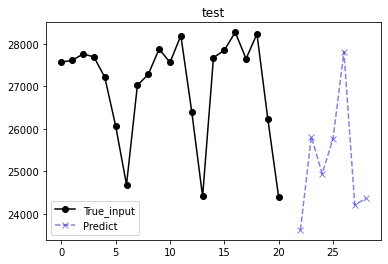

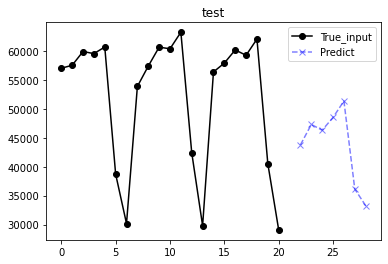

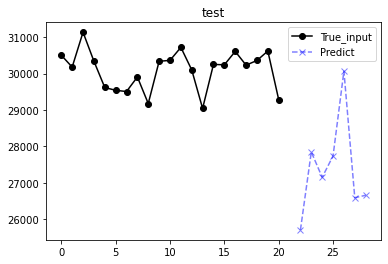

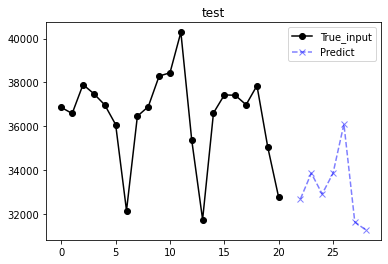

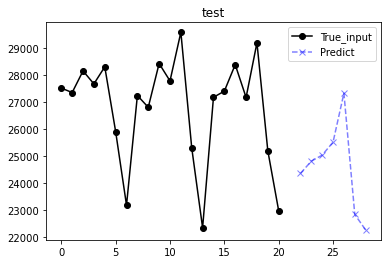

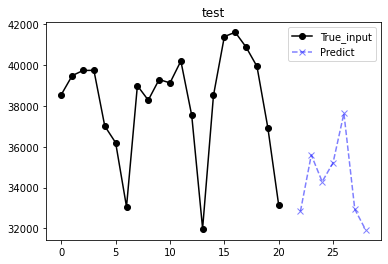

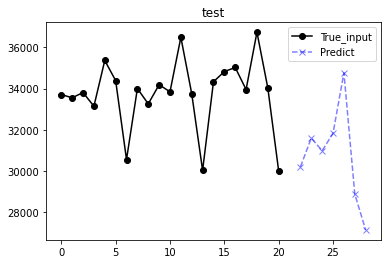

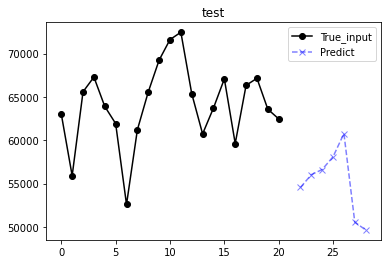

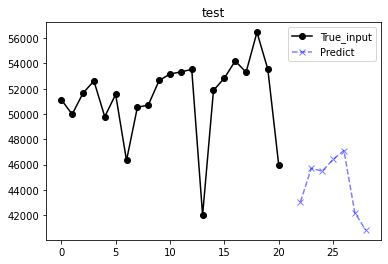

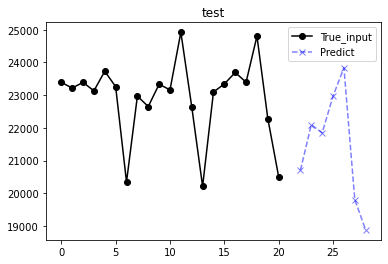

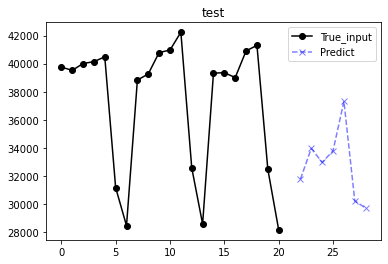

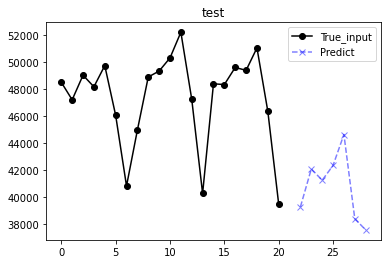

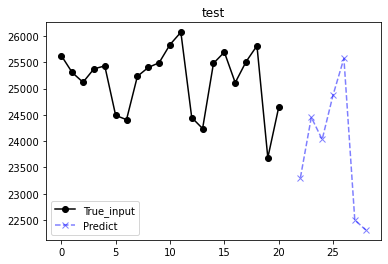

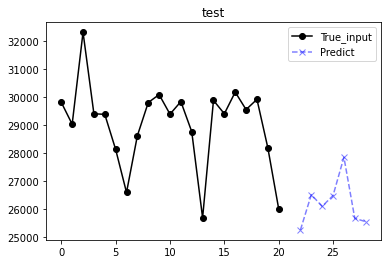

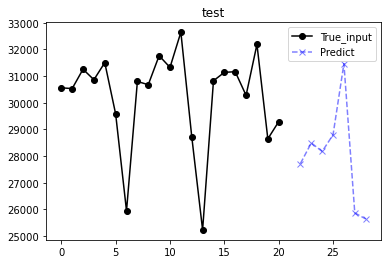

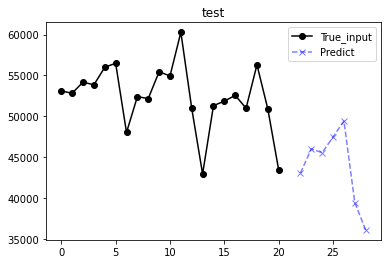

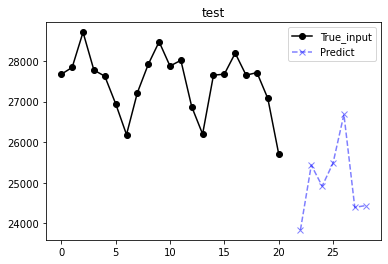

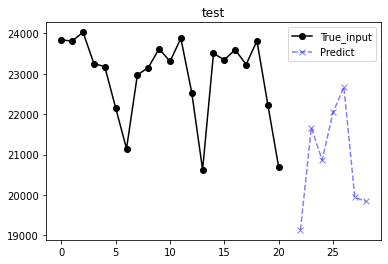

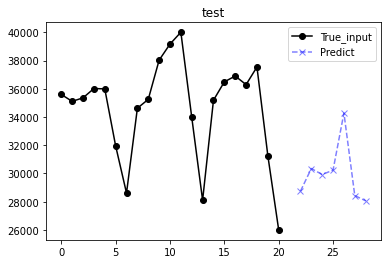

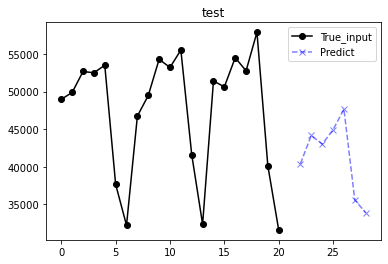

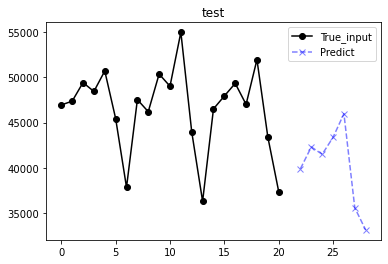

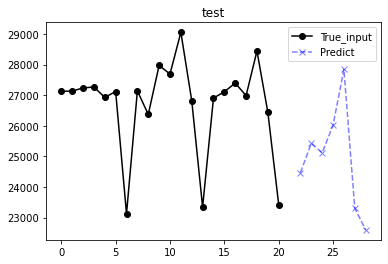

In [32]:
for i in range(69):
    plt.plot(np.arange(21), evening_x[i],   # m_train_time.cpu().detach().numpy()[i,:,-2],
            marker = 'o', color = 'black', label = 'True_input')
    plt.plot(np.arange(22,29),evening_pred[i],    #.cpu().detach().numpy()[i],
            color = 'blue', label = 'Predict', marker = 'x', ls = '--', alpha = 0.5)
            
    plt.title('test')
    plt.legend()
    plt.show()